In [36]:
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt

# Exercise 1 

In [11]:
S = np.array([100 , 50 , 25])
Q = np.array([1 , 3 , 5])
sig = np.log(S)
delta_sig_sd = np.array([1 , 2 , 3]) * 10**-3
N = 10**4
alpha = np.arange(.9,1,.01)

In [12]:
col_names = ['t3_1' , 't10_1' , 't50_1' , 'norm_1' , 't3_2' , 't10_2' , 't50_2' , 'norm_2' ,'t3_3' , 't10_3' , 't50_3' , 'norm_3']
df = pd.DataFrame(columns = col_names , index = range(N))
DoF = np.array([3 , 10 , 50])
for i in range(len(S)):
    scale_par = np.sqrt(DoF / (DoF - 2))/ delta_sig_sd[i]
    df[col_names[(i)*4]] = np.random.standard_t(DoF[0],N) / scale_par[0]
    df[col_names[(i)*4 +1]] = np.random.standard_t(DoF[1],N) / scale_par[1]
    df[col_names[(i)*4 +2]] = np.random.standard_t(DoF[2],N) / scale_par[2]
    df[col_names[(i)*4 +3]] = np.random.normal(0,delta_sig_sd[i],N)

In [24]:
col_names2 = ['t3' , 't10' , 't50' , 'norm']
df2 = pd.DataFrame(columns = col_names2 , index = range(N))
df2['t3'] = -(S * Q * (np.exp(df[['t3_1','t3_2','t3_3']]) - 1)).sum(axis = 1)
df2['t10'] = -(S * Q*(np.exp(df[['t10_1','t10_2','t10_3']]) - 1)).sum(axis = 1)
df2['t50'] = -(S * Q*(np.exp(df[['t50_1','t50_2','t50_3']]) - 1)).sum(axis = 1)
df2['norm'] = -(S * Q*(np.exp(df[['norm_1','norm_2','norm_3']]) - 1)).sum(axis = 1)

In [25]:
df2

,t3,t10,t50,norm
0,1.096028,0.241714,0.034091,-0.071361
1,-0.149329,0.534958,0.357213,0.367041
2,0.375287,-0.438913,-0.376401,0.776879
3,0.151087,0.296579,0.420685,0.552199
4,-0.101116,0.613617,0.110298,0.461762
...,...,...,...,...
9995,-0.176071,0.115478,-0.372504,-0.299968
9996,-1.049802,0.231819,0.218454,-0.617388
9997,0.026325,-0.367126,-0.844962,-0.746498
9998,0.006793,0.491747,-0.404633,-0.664403


In [26]:
df2.quantile(alpha)

,t3,t10,t50,norm
0.90,0.505544,0.620004,0.614902,0.621858
0.91,0.533966,0.644010,0.644432,0.652461
0.92,0.570238,0.674295,0.672402,0.684478
0.93,0.606586,0.709386,0.703384,0.721943
0.94,0.657080,0.743600,0.739110,0.758430
0.95,0.711337,0.792783,0.780326,0.795097
0.96,0.773651,0.853476,0.827393,0.850748
0.97,0.883514,0.930475,0.896570,0.908108
0.98,1.043861,1.021855,0.985513,0.989092
0.99,1.322983,1.183643,1.117960,1.132786


In [27]:
df2.quantile(alpha) - df2.mean()

,t3,t10,t50,norm
0.90,0.502771,0.621234,0.613747,0.624154
0.91,0.531194,0.645239,0.643277,0.654757
0.92,0.567465,0.675524,0.671247,0.686774
0.93,0.603813,0.710616,0.702229,0.724239
0.94,0.654308,0.744830,0.737955,0.760726
0.95,0.708565,0.794012,0.779171,0.797393
0.96,0.770879,0.854706,0.826238,0.853044
0.97,0.880742,0.931704,0.895415,0.910404
0.98,1.041088,1.023084,0.984358,0.991388
0.99,1.320211,1.184873,1.116805,1.135082


In [34]:
df_VaR = pd.DataFrame(columns = col_names2,index = alpha)
for i in range(len(alpha)):
    for j in range(len(col_names2)):
        #df_inter = df2[col_names2[j]].sort_values(ascending = False)[:int(round(N * (alpha[i])))]
        #df_inter = df2.sort_values()[:int(round((N*(1-alpha[i]))))]
        df_VaR.at[alpha[i],col_names2[j]] = df2[col_names2[j]].sort_values(ascending = False)[:int(round(N * (1 - alpha[i])))].mean()
df_VaR

,t3,t10,t50,norm
0.90,0.852438,0.868296,0.838482,0.855055
0.91,0.889326,0.894614,0.861721,0.879332
0.92,0.931323,0.924214,0.887077,0.905629
0.93,0.980218,0.957371,0.915379,0.934549
0.94,1.03843,0.995942,0.947671,0.966788
0.95,1.10939,1.04125,0.98537,1.00482
0.96,1.20185,1.0962,1.03093,1.05047
0.97,1.327,1.16581,1.08746,1.10781
0.98,1.51353,1.26147,1.16153,1.18979
0.99,1.86763,1.42488,1.27213,1.32402


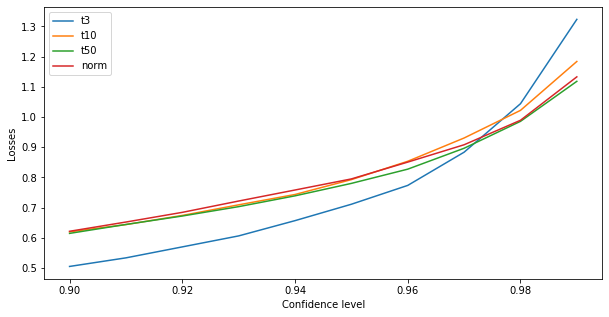

In [41]:
#Plot VaR
plt.figure(figsize = (10,5))
plt.plot(df2.quantile(alpha))
plt.xlabel('Confidence level')
plt.ylabel('Losses')
plt.legend(df2.columns)

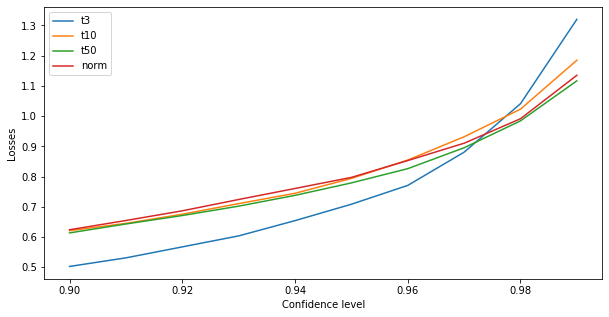

In [42]:
#Plot VaR mean
plt.figure(figsize = (10,5))
plt.plot(df2.quantile(alpha) - df2.mean())
plt.xlabel('Confidence level')
plt.ylabel('Losses')
plt.legend(df2.columns)

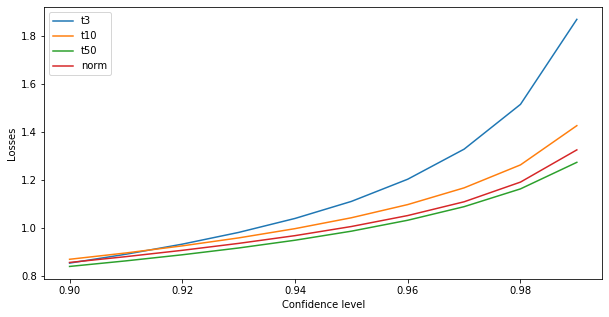

In [43]:
#Plot ES
plt.figure(figsize = (10,5))
plt.plot(df_VaR)
plt.xlabel('Confidence level')
plt.ylabel('Losses')
plt.legend(df_VaR)

# Exercise 2

In [7]:
#Set parameters
T = 0.5
r = 0.05
sig = 0.2
S = 100
K = 100
dt = 1/252
q = 0

In [35]:
alpha = np.array([0.95,0.99])
cov = np.array([[10**-6, -0.5 * 10**-7],[-0.5 * 10**-7, 10**-8]])
df = pd.DataFrame(np.random.multivariate_normal([0,0],cov,10**4),columns = ['X_1' , 'X_3'])

In [36]:
def European_Call (S,K,T,q,r,sig):
    d1 = (np.log(S/K) + (r - q + sig**2/2) * T)/(sig * np.sqrt(T))
    d2 = d1 - sig * np.sqrt(T)
    return S * np.exp(-q * T) * stats.norm.cdf(d1) - K * np.exp(-r * T) * stats.norm.cdf(d2)

def Theta(S,K,q,r,sig,delta):
    d1 = (np.log(S/K) + (r - q + sig**2 /2) * delta) / (sig * np.sqrt(delta))
    d2 = d1 - sig * np.sqrt(delta)
    return - np.exp(- q * delta) * S * stats.norm.pdf(d1) * sig / ( 2 * np.sqrt(delta)) - r * K * np.exp(- r * delta) * stats.norm.cdf(d2) + q * S * np.exp(-q * delta) * stats.norm.cdf(d1)

def Delta(S,K,q,r,sig,delta):
    d1 = (np.log(S/K) + (r - q + sig**2 /2) * delta) / (sig * np.sqrt(delta))
    return np.exp(-q*delta) * stats.norm.cdf(d1)

def Vega(S,K,q,r,sig,delta):
    d1 = (np.log(S/K) + (r - q + sig**2 /2) * delta) / (sig * np.sqrt(delta))
    return S * np.exp(-q * delta) * stats.norm.pdf(d1) * np.sqrt(delta)




In [37]:
C0 = European_Call(S,K,T,q,r,sig)
df_real = pd.DataFrame(columns = ['Price' , 'Sig'])
df_real.Price = S * np.exp(df.X_1)
df_real.Sig = sig + df.X_3

In [38]:
Val = pd.DataFrame(columns = ['Monte_Carlo' , 'Lin_Loss'])

In [39]:
Val.Monte_Carlo = C0 - European_Call(df_real.Price, K , T , q , r , df_real.Sig) - S + df_real.Price

In [40]:
Val.Lin_Loss = - (Theta(S,K,q,r,sig,T) * dt + df.X_1 * S *(1 + Delta(S,K,q,r,sig,T)) + df.X_3 * Vega(S,K,q,r,sig,T))

In [42]:
VaR = pd.DataFrame(index = ['Monte_Carlo' , 'Lin_Loss' , 'VarCovar'],columns = ['VaR_0.05','VaR_mean_0.05','ES_0.05','VaR_0.01','VaR_mean_0.01','ES_0.01'])

In [56]:
VaR.loc['Monte_Carlo'][0] = Val.Monte_Carlo.quantile(1 - alpha[0])
VaR.loc['Monte_Carlo'][1] = VaR.loc['Monte_Carlo'][0] - Val.Monte_Carlo.mean()
VaR.loc['Monte_Carlo'][2] = Val.Monte_Carlo.sort_values()[:int(round(N * (1 - alpha[0])))].mean()
VaR.loc['Monte_Carlo'][3] = Val.Monte_Carlo.quantile(1 - alpha[1])
VaR.loc['Monte_Carlo'][4] = VaR.loc['Monte_Carlo'][3] - Val.Monte_Carlo.mean()
VaR.loc['Monte_Carlo'][5] = Val.Monte_Carlo.sort_values()[:int(round(N * (1 - alpha[1])))].mean()

In [58]:
VaR.loc['Lin_Loss'][0] = Val.Lin_Loss.quantile(1 - alpha[0])
VaR.loc['Lin_Loss'][1] = VaR.loc['Lin_Loss'][0] - Val.Lin_Loss.mean()
VaR.loc['Lin_Loss'][2] = Val.Lin_Loss.sort_values()[:int(round(N * (1 - alpha[0])))].mean()
VaR.loc['Lin_Loss'][3] = Val.Lin_Loss.quantile(1 - alpha[1])
VaR.loc['Lin_Loss'][4] = VaR.loc['Lin_Loss'][3] - Val.Lin_Loss.mean()
VaR.loc['Lin_Loss'][5] = Val.Lin_Loss.sort_values()[:int(round(N * (1 - alpha[1])))].mean()

In [152]:
B = np.array([ (Delta(S,K,q,r,sig,T) + 1) * S , Vega(S,K,q,r,sig,T)])
VaR.loc['VarCovar'][0] = - Theta(S,K,q,r,sig,T) * dt + np.sqrt(np.matmul(B.transpose(),np.matmul(B,cov))) * stats.norm.ppf(1 - alpha[0])
VaR.loc['VarCovar'][1] = VaR.loc['VarCovar'][0]
VaR.loc['VarCovar'][2] = - Theta(S,K,q,r,sig,T) * dt + np.sqrt(np.matmul(B.transpose(),np.matmul(B,cov))) * stats.norm.pdf(stats.norm.ppf(1 - alpha[0]))/alpha[0]
VaR.loc['VarCovar'][3] = - Theta(S,K,q,r,sig,T) * dt + np.sqrt(np.matmul(B.transpose(),np.matmul(B,cov))) * stats.norm.ppf(1 - alpha[1])
VaR.loc['VarCovar'][4] = VaR.loc['VarCovar'][3]
VaR.loc['VarCovar'][5] = - Theta(S,K,q,r,sig,T) * dt + np.sqrt(np.matmul(B.transpose(),np.matmul(B,cov))) * stats.norm.pdf(stats.norm.ppf(1 - alpha[1]))/alpha[1]

In [153]:
VaR

,VaR_0.05,VaR_mean_0.05,ES_0.05,VaR_0.01,VaR_mean_0.01,ES_0.01
Monte_Carlo,-0.0676923,-0.0676655,-0.0854525,-0.0962278,-0.096201,-0.110306
Lin_Loss,-0.230745,-0.262787,-0.297985,-0.338092,-0.370135,-0.389182
VarCovar,-0.228377,-0.228377,0.0494053,-0.336341,-0.336341,0.0364712
